In [1]:
import seaborn

import yfinance as yf
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels
import seaborn as sns
import scipy
from scipy import stats
from statistics import mean


import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from scipy.stats import probplot, moment
import requests

#import graphviz
#import pydotplus

import eikon as ek  # the Eikon Python wrapper package
import configparser as cp

import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

import tensorflow as ts
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import rf_model

In [2]:
df = pd.read_csv("evaluation.csv")
df = df.dropna()
df

,Unnamed: 0,ExponentialMovingAverage,WeightedMovingAverage,StochasticSlow,MACDHisto,RSI,SmoothedMovingAverage,ATR,time,value,AO,WilliamR,Vol_signal
33,33,22.272977,21.817292,23.841060,-0.918013,39.884703,41.656040,0.891948,2012-05-02,1000000.000,-1.970281,-78.807947,0
34,34,22.101210,21.629477,17.849824,-0.961326,34.859427,40.976378,0.897523,2012-05-03,1000000.000,-1.942963,-96.119403,0
35,35,21.901116,21.412308,9.237057,-1.027382,32.062684,40.085009,0.879129,2012-05-04,1000000.000,-2.078287,-97.361478,0
36,36,21.711031,21.203385,4.833056,-1.073011,31.707557,39.247264,0.888477,2012-05-07,1000000.000,-2.242728,-92.019950,0
37,37,21.532490,21.005077,5.914418,-1.099724,31.492901,38.471827,0.846800,2012-05-08,1000000.000,-2.445313,-92.875318,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,2811,47.185498,47.588923,68.465809,0.678850,59.234829,56.773626,1.107860,2023-05-17,669601.335,1.520025,-28.758170,0
2812,2812,47.345075,47.747354,75.225942,0.743133,62.125976,57.308861,1.109441,2023-05-18,669601.335,1.652344,-6.474820,0
2813,2813,47.498530,47.901631,84.338449,0.791409,62.489777,57.826952,1.100910,2023-05-19,669601.335,1.856432,-11.751663,0
2814,2814,47.618644,48.024862,87.937809,0.797877,60.306349,58.074892,1.097273,2023-05-22,669601.335,1.910962,-17.960089,0


In [3]:
price_df = pd.read_csv("data.csv")
price_df




,Unnamed: 0,Datetime,Open,High,Low,Close,Volume
0,0,2012-03-15,23.00,23.50,22.70,23.40,13911300.0
1,1,2012-03-16,23.65,24.93,23.55,24.55,2063000.0
2,2,2012-03-19,24.50,25.00,24.06,24.85,974300.0
3,3,2012-03-20,24.71,25.20,24.25,24.80,444400.0
4,4,2012-03-21,24.65,25.18,24.13,24.25,782300.0
...,...,...,...,...,...,...,...
2812,2812,2023-05-18,48.50,49.37,48.24,49.26,767826.0
2813,2813,2023-05-19,49.67,49.87,48.88,49.34,776622.0
2814,2814,2023-05-22,49.22,49.58,48.53,49.06,1398773.0
2815,2815,2023-05-23,49.00,49.43,48.33,48.33,535454.0


In [4]:
df["Closing price"] = price_df["Close"]

In [5]:
df.columns

Index(['Unnamed: 0', 'ExponentialMovingAverage', 'WeightedMovingAverage',
       'StochasticSlow', 'MACDHisto', 'RSI', 'SmoothedMovingAverage', 'ATR',
       'time', 'value', 'AO', 'WilliamR', 'Vol_signal', 'Closing price'],
      dtype='object')

In [6]:
df["Short_window"] = df["Closing price"].rolling(3).mean
df["Short_window"] = df["Closing price"].rolling(3).mean

In [7]:
#df.drop(['Closing prrce'])
print(df["Closing price"])
#A function to compute a new pandas series for percentage changes of items inside a list
def pct_change(lst):
    changes = []
    for i in range(len(lst)):
        if i > 0:
            changes.append((lst[i] - lst[i-1])/lst[i-1])
        else:
            changes.append(0)

    df = pd.DataFrame(changes, index=None)
    return df

def turn_trend_into_bin(lst):
    lst = list(lst)
    bin = []
    for i in lst:
        if i > 0:
            bin.append(1)
        else:
            bin.append(-1)

    return pd.DataFrame(bin, index = None)

def range_interval(lst, high, low):
    lst = list(lst)
    ter = []
    for i in lst:
        if i >= high:
            ter.append(1)
        elif i > low:
            ter.append(0)
        else:
            ter.append(-1)

    return pd.DataFrame(ter, index = None)


#changes mean
short_window = 1
long_window = 40

df["Short_window"] = pct_change(list(df["Closing price"])).rolling(short_window).mean()
df["Long_window"] = pct_change(list(df["Closing price"])).rolling(long_window).mean()
# df["RSI_pct_change"] = pct_change(list(df["RSI"]))

df["RSI_range"] = range_interval(df["RSI"], 65, 38)
df["WMV_pct_change"] = pct_change(list(df['WeightedMovingAverage']))
df["WilliamR_range"] = range_interval(df["WilliamR"], -80, -20)

33      20.88
34      20.04
35      19.50
36      19.43
37      19.39
        ...  
2811    48.63
2812    49.26
2813    49.34
2814    49.06
2815    48.33
Name: Closing price, Length: 2783, dtype: float64


In [8]:
# df["Short_window"].plot()
# df["Long_window"].plot()

df["Short window bin"] = turn_trend_into_bin(df["Short_window"])
df["Long window bin"] = turn_trend_into_bin(df["Long_window"])
# df["RSI_bin"] = turn_trend_into_bin(df["RSI_pct_change"])
df["WMV_bin"] = turn_trend_into_bin(df["WMV_pct_change"])


df = df.fillna(method="ffill")
df.to_csv("pre_model.csv")

In [9]:
#List out combinations that might help
comb_1 = ['WeightedMovingAverage', 'RSI_range']
feature_cols = ['ExponentialMovingAverage', 'WeightedMovingAverage','StochasticSlow', 'MACDHisto', 'RSI', 'SmoothedMovingAverage', 'ATR']

using = ["RSI", "WilliamR"]
X = df[using].values # Features
y = df["Short window bin"].values # Target variable

# df_2 = pd.read_csv("evaluation2.csv")
# X_test = df_2[feature_cols].dropna().values
# y_test = df_2["value"].dropna().values

In [10]:



model = rf_model.model("pre_model.csv", "data.csv")

svm = model.svm_model(using, ["Long window bin"])


#Short window accuracy: 0.525
#Long window accuracy: 0.526

#After changing the timeframe to 1
#Short window accuracy: 0.558
#We observe a linear relationship between win rate and windows length


C:\Users\tszki\Anaconda3\envs\momentum_trading_research\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
result = {"Window length":[], "Accuracy":[]}


for i in range(20, 150):
    #Set up a loop to check if the model accuracy improve with the length of long window
    long_window = i

    df["Short_window"] = pct_change(list(df["Closing price"])).rolling(short_window).mean()
    df["Long_window"] = pct_change(list(df["Closing price"])).rolling(long_window).mean()
    # df["RSI_pct_change"] = pct_change(list(df["RSI"]))

    df["RSI_range"] = range_interval(df["RSI"], 65, 38)
    df["WMV_pct_change"] = pct_change(list(df['WeightedMovingAverage']))
    df["WilliamR_range"] = range_interval(df["WilliamR"], -80, -20)


    # df["Short_window"].plot()
    # df["Long_window"].plot()

    df["Short window bin"] = turn_trend_into_bin(df["Short_window"])
    df["Long window bin"] = turn_trend_into_bin(df["Long_window"])
    # df["RSI_bin"] = turn_trend_into_bin(df["RSI_pct_change"])
    df["WMV_bin"] = turn_trend_into_bin(df["WMV_pct_change"])


    df = df.fillna(method="ffill")
    df.to_csv("pre_model.csv")

    model = rf_model.model("pre_model.csv", "data.csv")

    result["Window length"].append(long_window)
    result["Accuracy"].append(model.svm_model(using, ["Long window bin"]))


C:\Users\tszki\Anaconda3\envs\momentum_trading_research\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tszki\Anaconda3\envs\momentum_trading_research\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tszki\Anaconda3\envs\momentum_trading_research\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tszki\Anaconda3\envs\momentum_trading_research\lib\site-packages\sklearn\utils\validation.py:1143: D

Text(0.5, 0, 'Time frame')

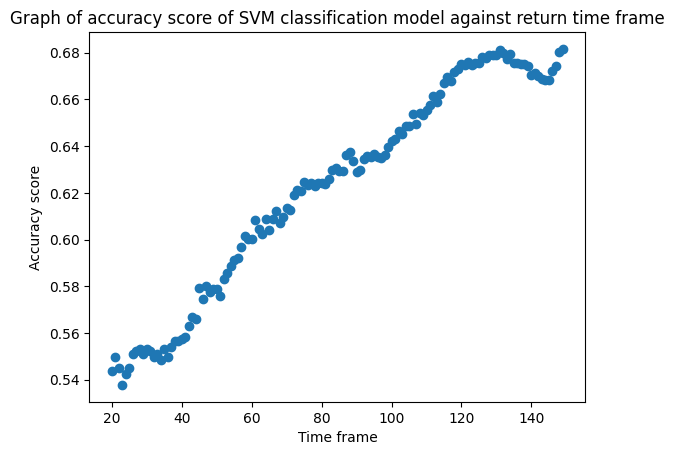

In [13]:
import rf_model
df = pd.DataFrame(result)
plt.scatter(x = df["Window length"], y = df["Accuracy"])
plt.title("Graph of accuracy score of SVM classification model against return time frame")
plt.ylabel("Accuracy score")
plt.xlabel("Time frame")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

In [ ]:
model = Sequential()
input_dimension = len(using)
model.add(Dense(500, activation='relu', input_dim=input_dimension))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# build the model
model.fit(X_train, y_train, epochs=20)

In [ ]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))

pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

In [ ]:
#Random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
import data_api
connection = data_api.API_connection()

df_raw = connection.backtester_data_usage("daily", "AXL", "NA")
print(df_raw)

df = pd.read_csv("evaluation2.csv")


df["Closing price"] = df_raw["Close"]

df["Short_window"] = pct_change(list(df["Closing price"])).rolling(short_window).mean()
df["Long_window"] = pct_change(list(df["Closing price"])).rolling(long_window).mean()
# df["RSI_pct_change"] = pct_change(list(df["RSI"]))

df["RSI_range"] = range_interval(df["RSI"], 65, 38)
df["WMV_pct_change"] = pct_change(list(df['WeightedMovingAverage']))

df["Short window bin"] = turn_trend_into_bin(df["Short_window"])
df["Long window bin"] = turn_trend_into_bin(df["Long_window"])
# df["RSI_bin"] = turn_trend_into_bin(df["RSI_pct_change"])
df["WMV_bin"] = turn_trend_into_bin(df["WMV_pct_change"])

df = df.fillna(method="ffill")

X_test = df[using].values # Features
# X_test = X_test[using]

In [ ]:

y_test = df["Short window bin"]

y_pred = rf.predict(X_test)
result_df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
result_df

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
pred = rf.predict(pd.DataFrame({"RSI_range":0, "WMV_bin":-1}, index=[0]))
pred

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X, y)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",sklearn.metrics.accuracy_score(y_test, y_pred))

In [ ]:
pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = using,class_names=None)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
from sklearn import preprocessing as pp

sc = pp.StandardScaler()
normed_train_data = pd.DataFrame(sc.fit_transform(X_train), columns = ["RSI_TER", "WMV_bin"])
normed_test_data = pd.DataFrame(sc.fit_transform(X_test), columns = ["RSI_TER", "WMV_bin"])

In [ ]:
testing_set = df[['ExponentialMovingAverage', 'WeightedMovingAverage','StochasticSlow', 'MACDHisto', 'RSI', 'SmoothedMovingAverage', 'ATR']]

In [ ]:
import seaborn

seaborn.pairplot(testing_set)